In [ ]:
cd /content/drive/MyDrive/딥러닝/코드

/content/drive/MyDrive/딥러닝/코드


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from keras import models
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [ ]:
path = '/content/drive/MyDrive/딥러닝/코드/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/'
os.listdir(path)

['example_submission.csv',
 'fer2013.tar.gz',
 'icml_face_data.csv',
 'test.csv',
 'train.csv']

In [ ]:
data = pd.read_csv(path+'icml_face_data.csv')

In [ ]:
data.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [ ]:
def prepare_data(data):
    """ Prepare data for modeling 
        input: data frame with labels und pixel data
        output: image and label array """
    
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))
    
    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, ' pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image
        
    return image_array, image_label

def plot_examples(label=0):
    fig, axs = plt.subplots(1, 5, figsize=(25, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(5):
        idx = data[data['emotion']==label].index[i]
        axs[i].imshow(train_images[idx][:,:,0], cmap='gray')
        axs[i].set_title(emotions[train_labels[idx].argmax()])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
        
def plot_all_emotions():
    fig, axs = plt.subplots(1, 7, figsize=(30, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(7):
        idx = data[data['emotion']==i].index[i]
        axs[i].imshow(train_images[idx][:,:,0], cmap='gray')
        axs[i].set_title(emotions[train_labels[idx].argmax()])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
        
def plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, image_number):
    """ Function to plot the image and compare the prediction results with the label """
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    
    bar_label = emotions.values()
    
    axs[0].imshow(test_image_array[image_number], 'gray')
    axs[0].set_title(emotions[test_image_label[image_number]])
    
    axs[1].bar(bar_label, pred_test_labels[image_number], color='orange', alpha=0.7)
    axs[1].grid()
    
    plt.show()
    
def plot_compare_distributions(array1, array2, title1='', title2=''):
    df_array1 = pd.DataFrame()
    df_array2 = pd.DataFrame()
    df_array1['emotion'] = array1.argmax(axis=1)
    df_array2['emotion'] = array2.argmax(axis=1)
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    x = emotions.values()
    
    y = df_array1['emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[0].bar(x, y.sort_index(), color='orange')
    axs[0].set_title(title1)
    axs[0].grid()
    
    y = df_array2['emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[1].bar(x, y.sort_index())
    axs[1].set_title(title2)
    axs[1].grid()
    
    plt.show()

In [ ]:
data[' Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name:  Usage, dtype: int64

In [ ]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

In [ ]:
train_image_array, train_image_label = prepare_data(data[data[' Usage']=='Training'])
val_image_array, val_image_label = prepare_data(data[data[' Usage']=='PrivateTest'])
test_image_array, test_image_label = prepare_data(data[data[' Usage']=='PublicTest'])

In [ ]:
train_images = train_image_array.reshape((train_image_array.shape[0], 48, 48, 1))
train_images = train_images.astype('float32')/255
val_images = val_image_array.reshape((val_image_array.shape[0], 48, 48, 1))
val_images = val_images.astype('float32')/255
test_images = test_image_array.reshape((test_image_array.shape[0], 48, 48, 1))
test_images = test_images.astype('float32')/255

In [ ]:
train_labels = to_categorical(train_image_label)
val_labels = to_categorical(val_image_label)
test_labels = to_categorical(test_image_label)

# All Emotions

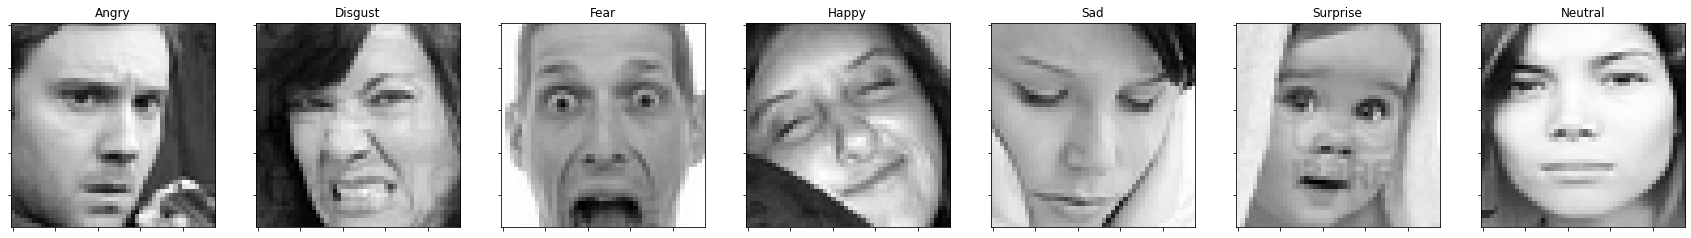

In [ ]:
plot_all_emotions()

# Angry

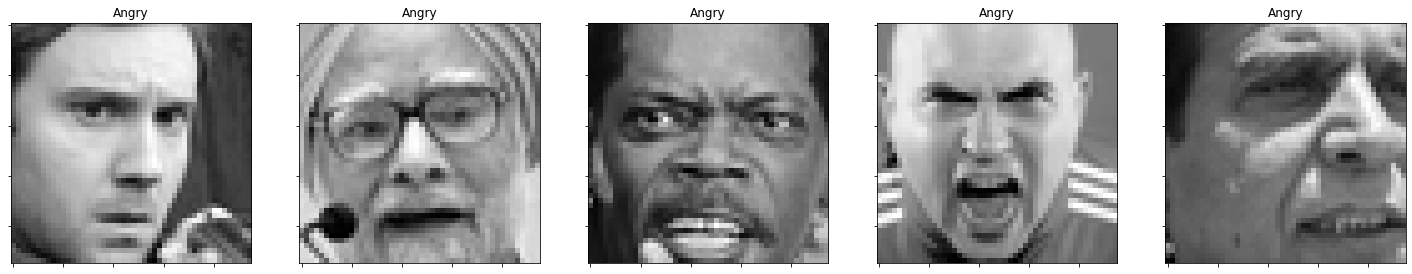

In [ ]:
plot_examples(label=0)

# Disgust

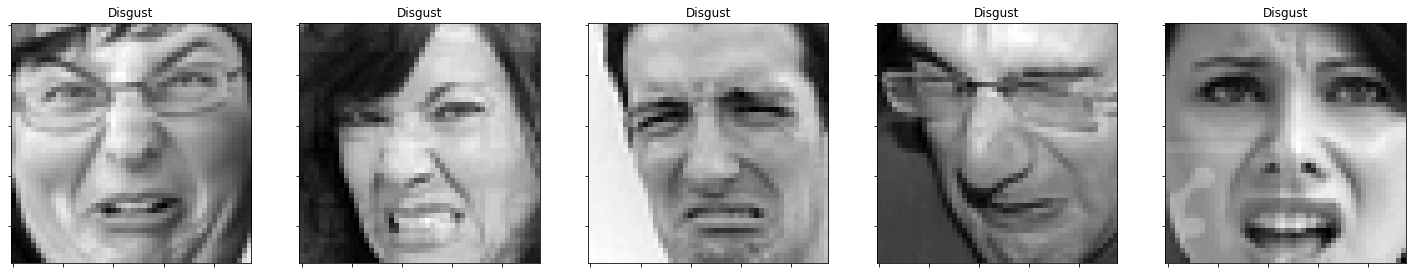

In [ ]:
plot_examples(label=1)

# Fear

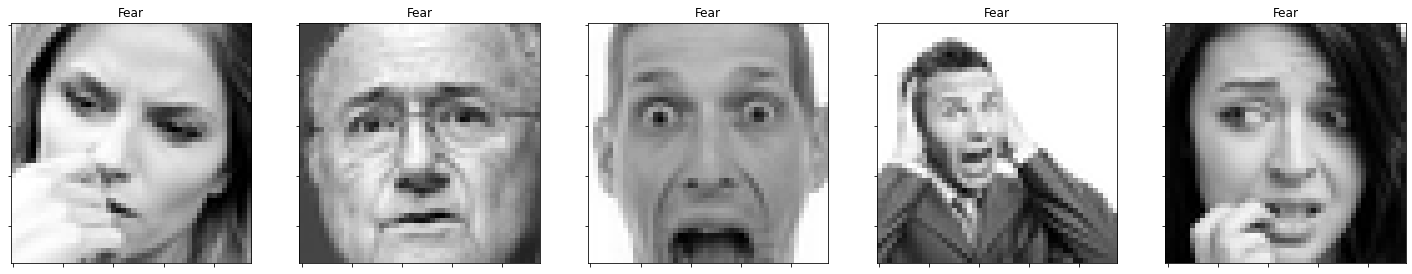

In [ ]:
plot_examples(label=2)

# Happy

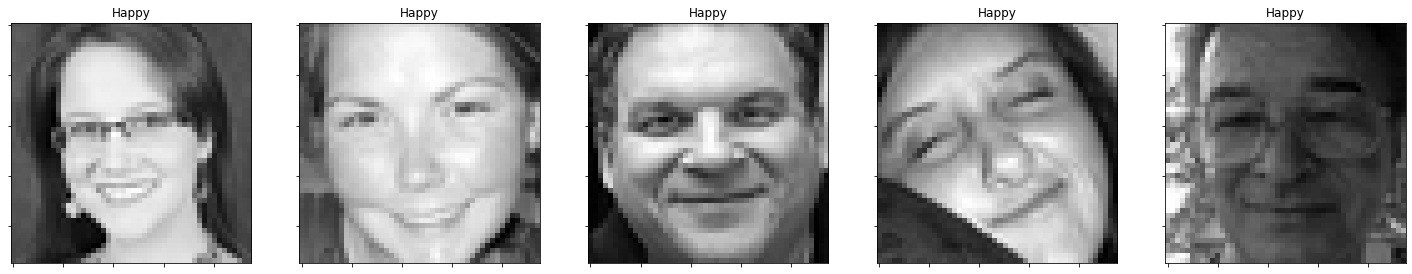

In [ ]:
plot_examples(label=3)

# Sad

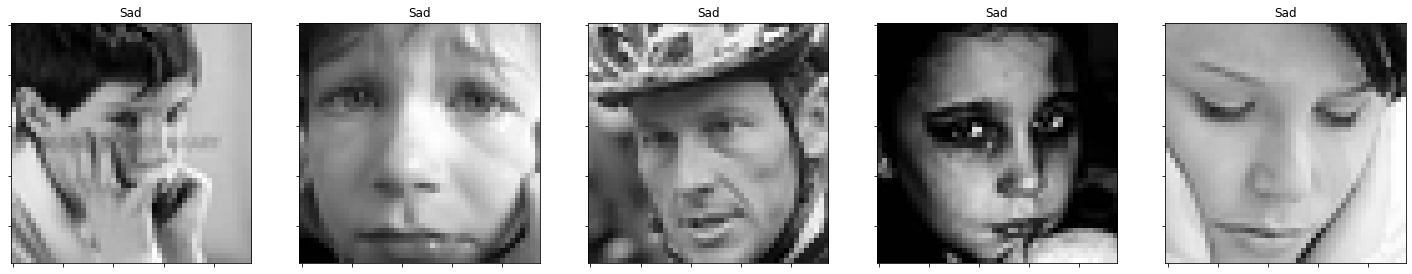

In [ ]:
plot_examples(label=4)

# Surprise

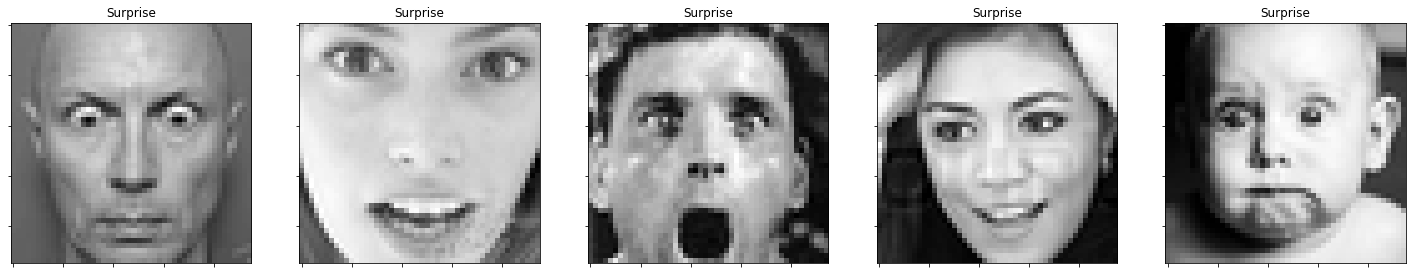

In [ ]:
plot_examples(label=5)

# Neutral

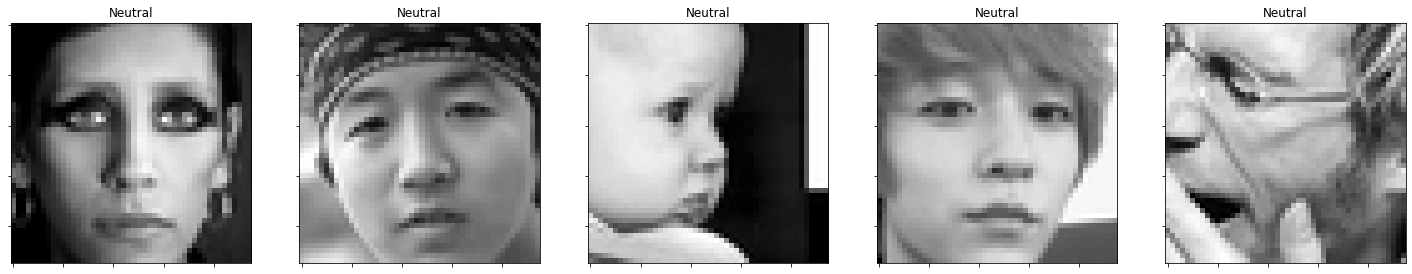

In [ ]:
plot_examples(label=6)

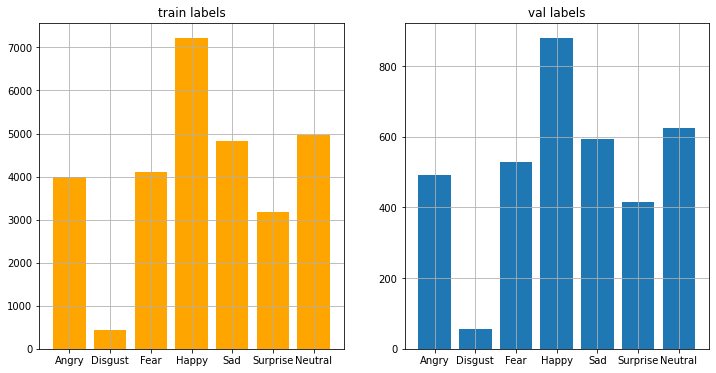

In [ ]:
plot_compare_distributions(train_labels, val_labels, title1='train labels', title2='val labels')

In [ ]:
class_weight = dict(zip(range(0, 7), (((data[data[' Usage']=='Training']['emotion'].value_counts()).sort_index())/len(data[data[' Usage']=='Training']['emotion'])).tolist()))

In [ ]:
class_weight

{0: 0.1391549688251071,
 1: 0.01518687519593159,
 2: 0.14270786164617366,
 3: 0.2513149186666202,
 4: 0.16823992476226968,
 5: 0.11045316799609878,
 6: 0.17294228290779895}

In [ ]:
# 컨볼루션 신경망의 설정

model = models.Sequential()
model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(48, 48, 1), activation='relu'))     # 실제 이미지 사진 사이즈
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(64, (2, 2), activation='relu'))

model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(64, (2, 2), activation='relu'))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,  activation='relu'))
model.add(Dense(7, activation='softmax'))       # 마지막 위치는 반드시 y의 유니크 갯수

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 47, 47, 32)        160       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 22, 22, 64)        8256      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 10, 10, 64)        16448     
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 6400)            

In [ ]:
# 모델의 실행
# 2000개의 자료를 배치 200이라고하면 200개씩 나누어서 읽음. 즉, 10회 진행함

history = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), class_weight = class_weight, 
                    epochs=14, batch_size=64, verbose=1)

Epoch 1/14
449/449 [==============================] - 3s 5ms/step - loss: 0.2804 - accuracy: 0.2782 - val_loss: 1.7409 - val_accuracy: 0.3806
Epoch 2/14
449/449 [==============================] - 2s 4ms/step - loss: 0.2353 - accuracy: 0.4173 - val_loss: 1.4383 - val_accuracy: 0.4595
Epoch 3/14
449/449 [==============================] - 2s 4ms/step - loss: 0.2138 - accuracy: 0.4754 - val_loss: 1.4300 - val_accuracy: 0.4670
Epoch 4/14
449/449 [==============================] - 2s 4ms/step - loss: 0.2038 - accuracy: 0.4947 - val_loss: 1.3735 - val_accuracy: 0.4804
Epoch 5/14
449/449 [==============================] - 2s 4ms/step - loss: 0.1930 - accuracy: 0.5258 - val_loss: 1.2715 - val_accuracy: 0.5183
Epoch 6/14
449/449 [==============================] - 2s 4ms/step - loss: 0.1854 - accuracy: 0.5385 - val_loss: 1.2569 - val_accuracy: 0.5216
Epoch 7/14
449/449 [==============================] - 2s 4ms/step - loss: 0.1787 - accuracy: 0.5657 - val_loss: 1.2601 - val_accuracy: 0.5222
Epoch 

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test caccuracy:', test_acc)

113/113 [==============================] - 0s 2ms/step - loss: 1.2592 - accuracy: 0.5517
test caccuracy: 0.5516856908798218


In [ ]:
pred_test_labels = model.predict(test_images)

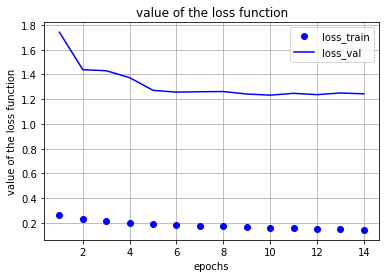

In [ ]:
loss = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='loss_train')
plt.plot(epochs, loss_val, 'b', label='loss_val')
plt.title('value of the loss function')
plt.xlabel('epochs')
plt.ylabel('value of the loss function')
plt.legend()
plt.grid()
plt.show()


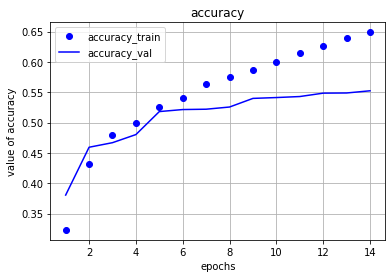

In [ ]:

acc = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, 'bo', label='accuracy_train')
plt.plot(epochs, acc_val, 'b', label='accuracy_val')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('value of accuracy')
plt.legend()
plt.grid()
plt.show()

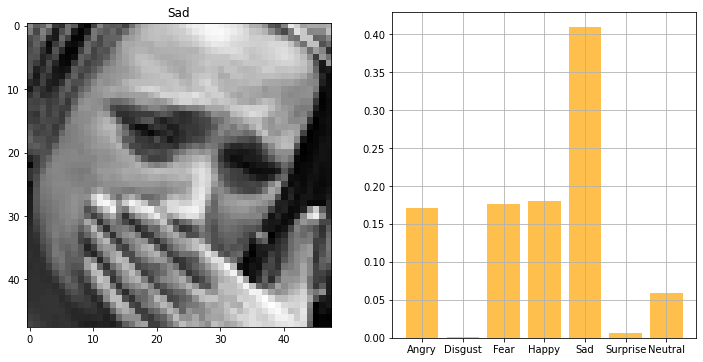

In [ ]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, 124)

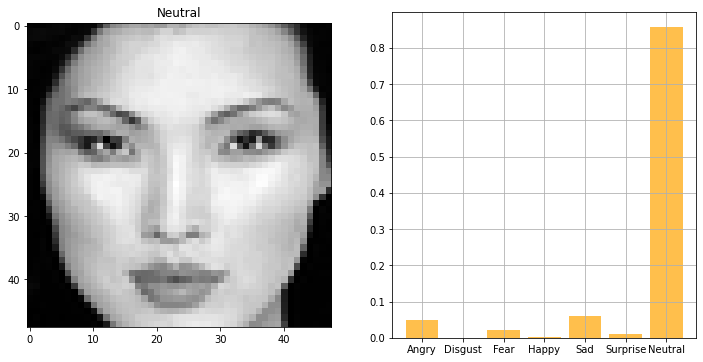

In [ ]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, 60)

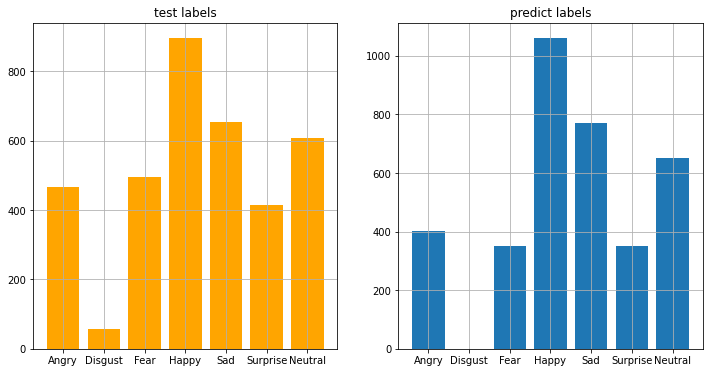

In [ ]:
plot_compare_distributions(test_labels, pred_test_labels, title1='test labels', title2='predict labels')

In [ ]:
from keras.models import load_model

model.save('Facial_Expression_Recognition_model.h5')